## 1. Thêm thư viện

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np





## 2. Đọc dữ liệu

In [3]:
# Đọc dữ liệu môn Toán
df = pd.read_csv(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat.csv', sep=';')

## 3. Gán nhãn học lực và loại bỏ đặc trưng về điểm

In [4]:
def classify_performance(avg_score):
    if avg_score >= 15:
        return 'Excellent'
    elif avg_score >= 10:
        return 'Good'
    elif avg_score >= 5:
        return 'Average'
    else:
        return 'Poor'

def process_student_data(input_csv, output_csv):
    # Đọc dữ liệu từ file CSV
    df = pd.read_csv(input_csv, sep=';')
    
    # Tính điểm trung bình của G1, G2 và G3
    df['avg_score'] = df[['G1', 'G2', 'G3']].mean(axis=1)
    
    # Gán nhãn học lực dựa trên điểm trung bình
    df['G_label'] = df['avg_score'].apply(classify_performance)
    
    # Loại bỏ cột G1, G2, G3 (vì dùng điểm đó để tạo nhãn rồi)
    df = df.drop(columns=['G1', 'G2', 'G3', 'avg_score'])
    
    # Lưu dữ liệu đã xử lý vào file mới
    df.to_csv(output_csv, index=False)
    print(f"Dữ liệu đã được xử lý và lưu vào: {output_csv}")

# Ví dụ sử dụng
process_student_data(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat.csv',
                     r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat-labeled.csv')

Dữ liệu đã được xử lý và lưu vào: D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat-labeled.csv


## 3. Xây dựng mô hình ID3 và Random Forest Classifier (dự đoán học lực)

Accuracy - Decision Tree (ID3): 0.2911
Accuracy - Random Forest: 0.5063

Confusion Matrix - Decision Tree:
[[ 6  6 18  1]
 [ 2  5  7  0]
 [12  7 11  1]
 [ 0  0  2  1]]

Confusion Matrix - Random Forest:
[[11  0 20  0]
 [ 1  1 12  0]
 [ 3  0 28  0]
 [ 1  0  2  0]]

Macro AUC - Decision Tree: 0.5198
Macro AUC - Random Forest: 0.6827


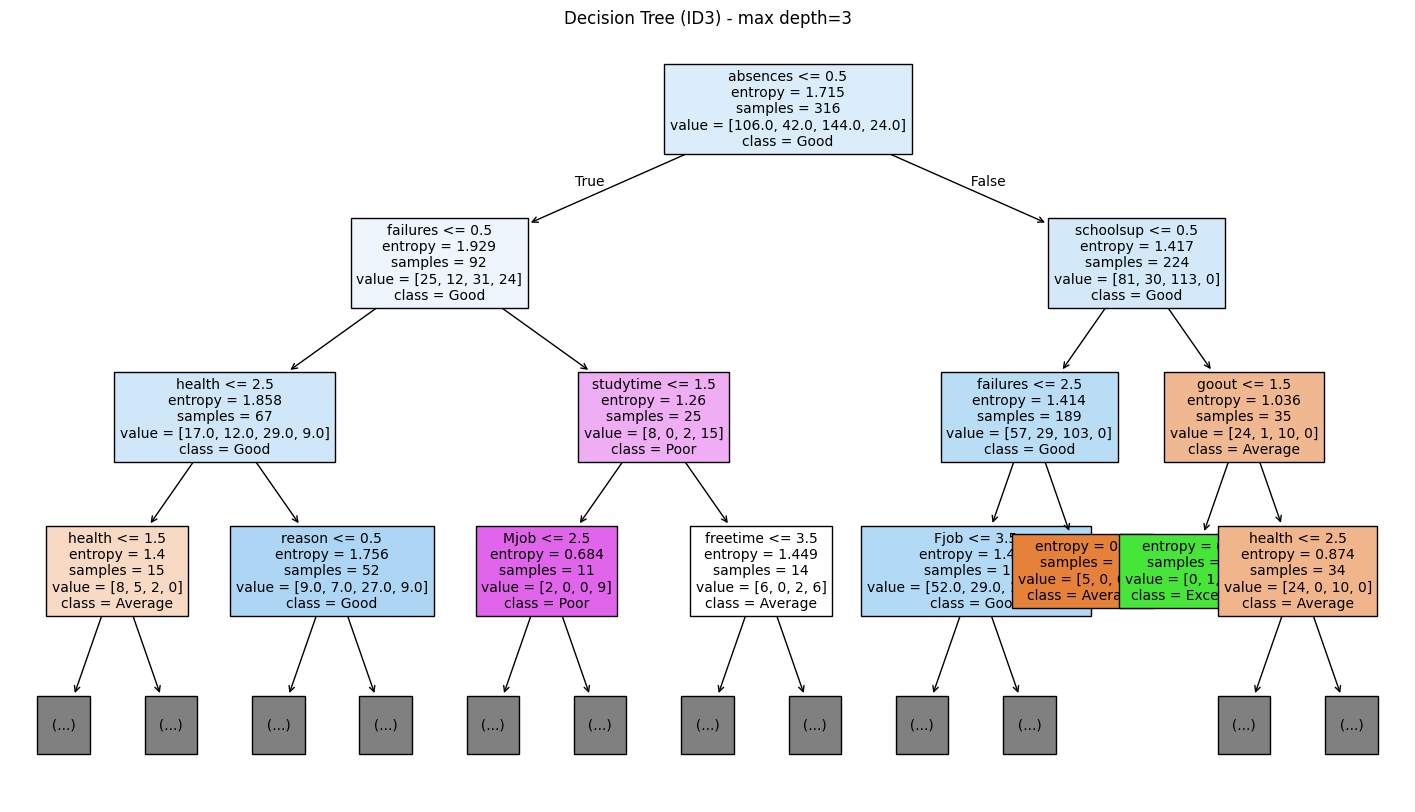

In [12]:
def run_classification(input_csv):
    # Đọc dữ liệu
    df = pd.read_csv(input_csv)
    
    # Tách X, y
    X = df.drop(columns=['G_label'])
    y = df['G_label']
    
    # Mã hóa các biến phân loại trong X
    for col in X.columns:
        if X[col].dtype == 'object':
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
    
    # Mã hóa nhãn y
    le_y = LabelEncoder()
    y_encoded = le_y.fit_transform(y)
    
    # Chia train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    
    # ID3 (Decision Tree với criterion="entropy")
    dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    acc_dt = accuracy_score(y_test, y_pred_dt)
    
    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    
    print(f"Accuracy - Decision Tree (ID3): {acc_dt:.4f}")
    print(f"Accuracy - Random Forest: {acc_rf:.4f}")
    
    # Ma trận nhầm lẫn cho DT và RF
    print("\nConfusion Matrix - Decision Tree:")
    print(confusion_matrix(y_test, y_pred_dt))
    print("\nConfusion Matrix - Random Forest:")
    print(confusion_matrix(y_test, y_pred_rf))
    
    # AUC cho bài toán đa lớp (One-vs-Rest)
    # Binarize labels cho ROC AUC
    y_test_bin = label_binarize(y_test, classes=np.arange(len(le_y.classes_)))
    
    y_score_dt = dt.predict_proba(X_test)
    y_score_rf = rf.predict_proba(X_test)
    
    auc_dt = roc_auc_score(y_test_bin, y_score_dt, average='macro')
    auc_rf = roc_auc_score(y_test_bin, y_score_rf, average='macro')
    
    print(f"\nMacro AUC - Decision Tree: {auc_dt:.4f}")
    print(f"Macro AUC - Random Forest: {auc_rf:.4f}")
    
    # Vẽ cây Decision Tree (giới hạn max_depth=3)
    plt.figure(figsize=(18,10))
    plot_tree(dt, feature_names=X.columns, class_names=le_y.classes_, filled=True, max_depth=3, fontsize=10)
    plt.title("Decision Tree (ID3) - max depth=3")
    plt.show()

# Ví dụ gọi hàm
run_classification(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat-labeled.csv')


## 3. Xây dựng mô hình Random Forest Regression (dự đoán điểm số)

Decision Tree (ID3-style regression):
MSE G1: 22.39
MSE G2: 21.25
MSE G3: 23.14

 Random Forest:
MSE G1: 11.16
MSE G2: 10.11
MSE G3: 13.83

 So sánh MSE:
G1 - Tree: 22.39, Forest: 11.16
G2 - Tree: 21.25, Forest: 10.11
G3 - Tree: 23.14, Forest: 13.83


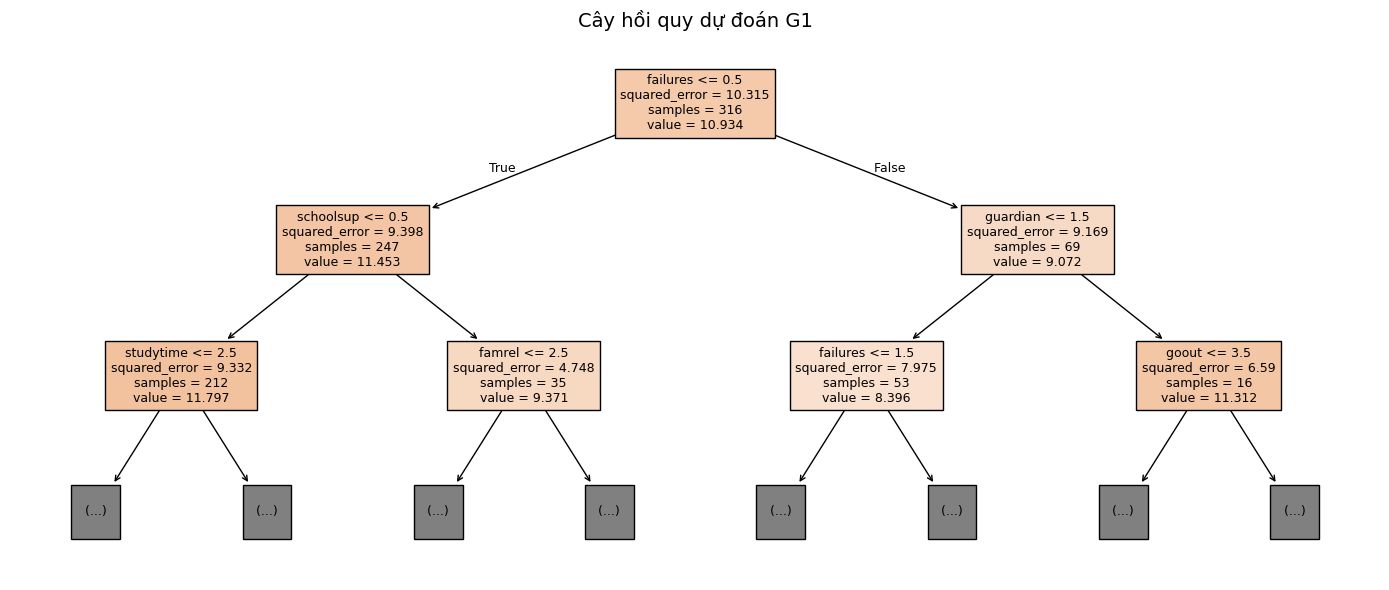

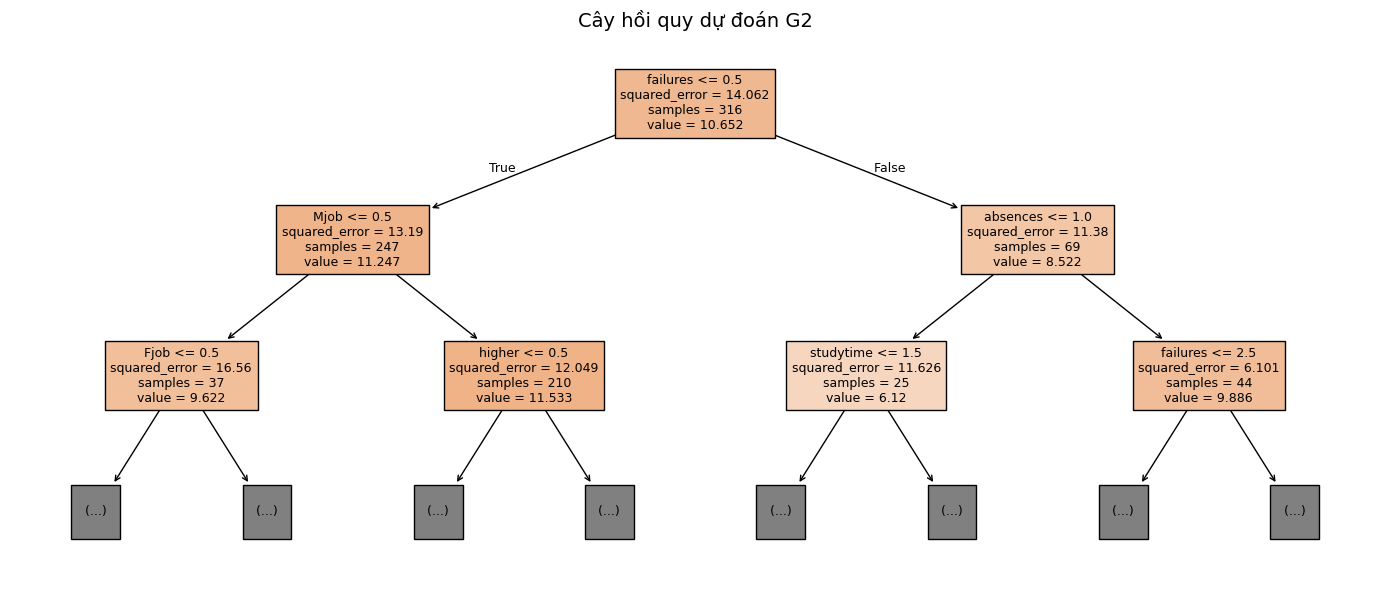

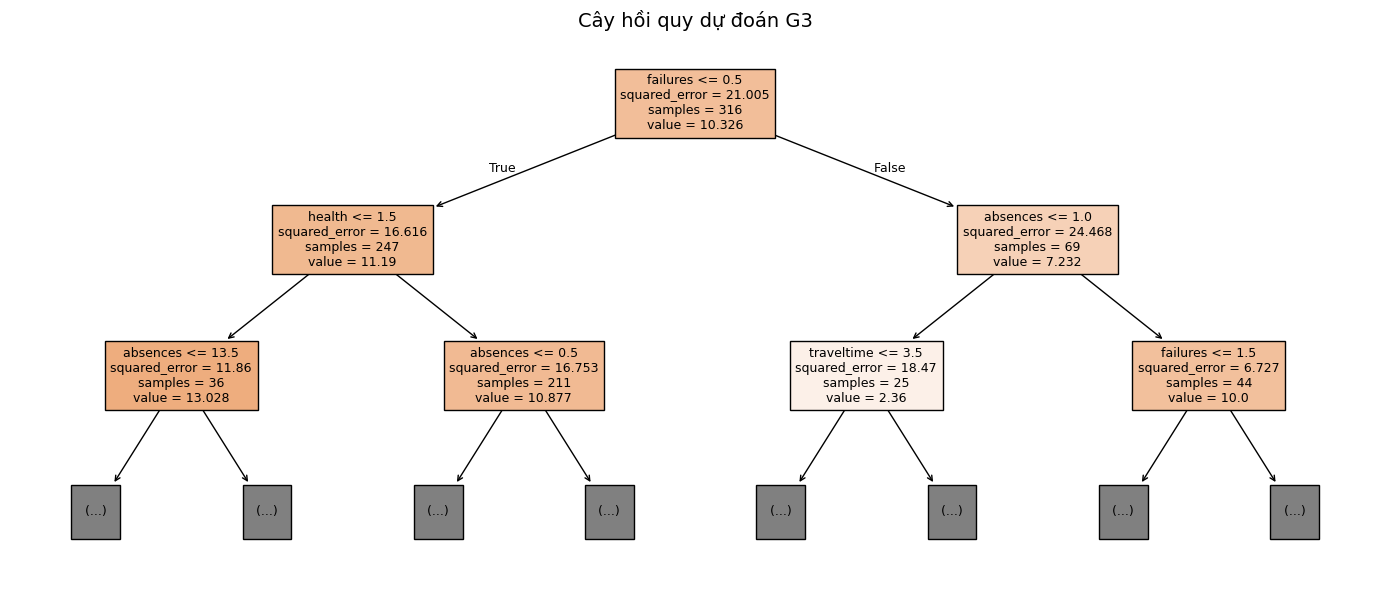

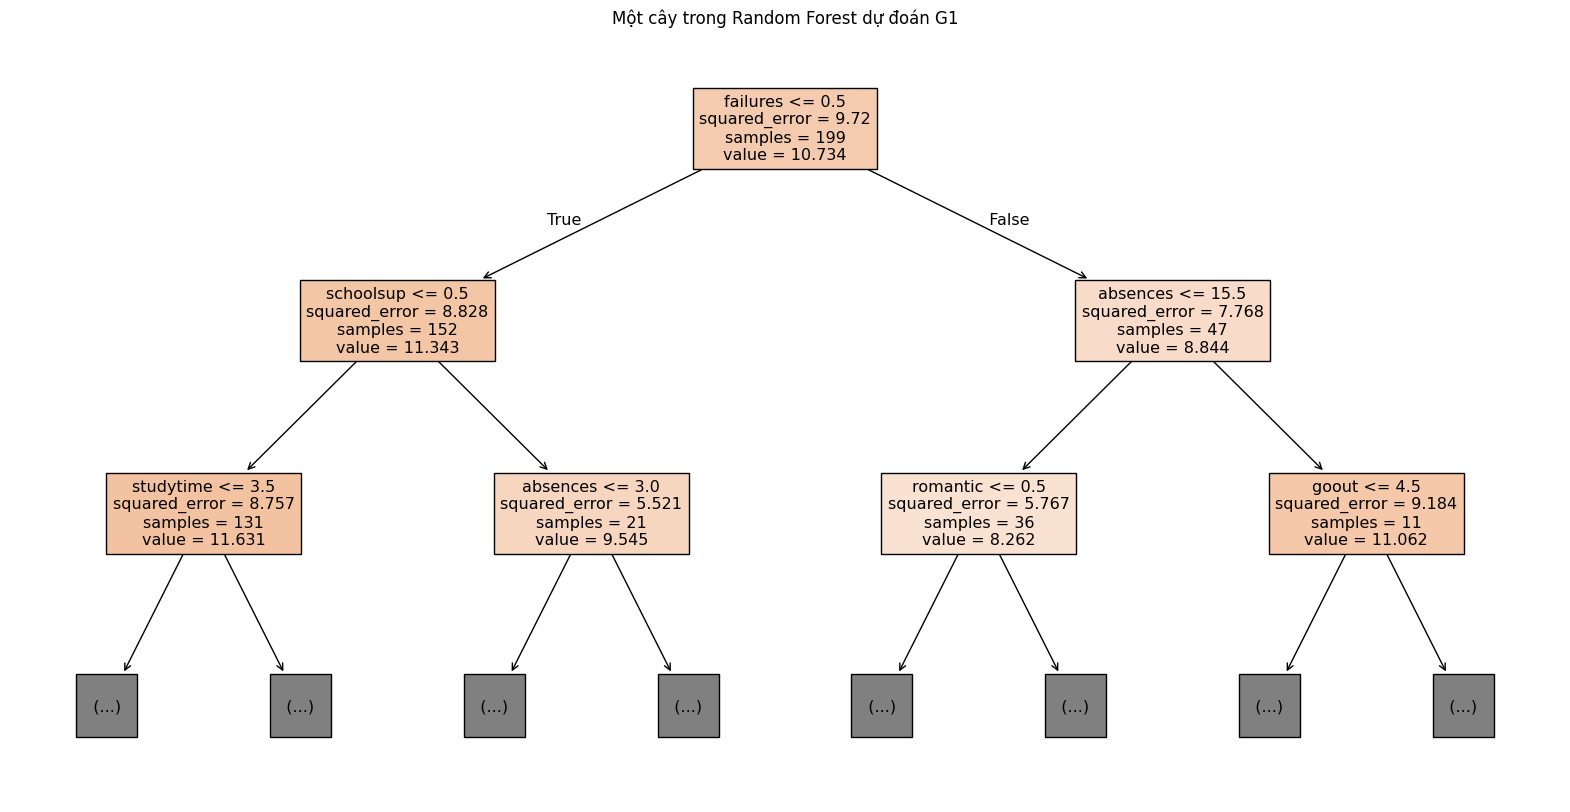

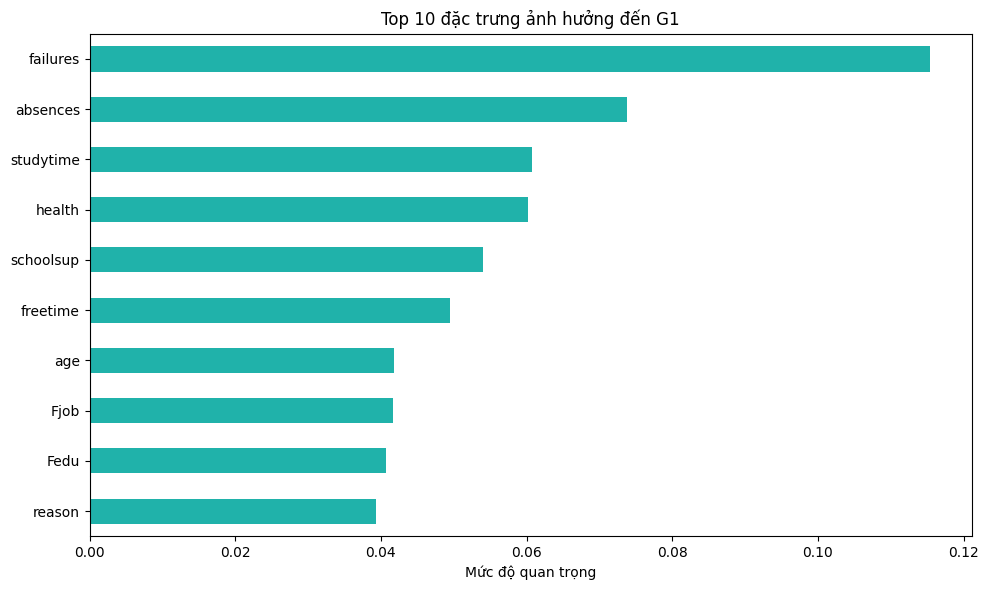

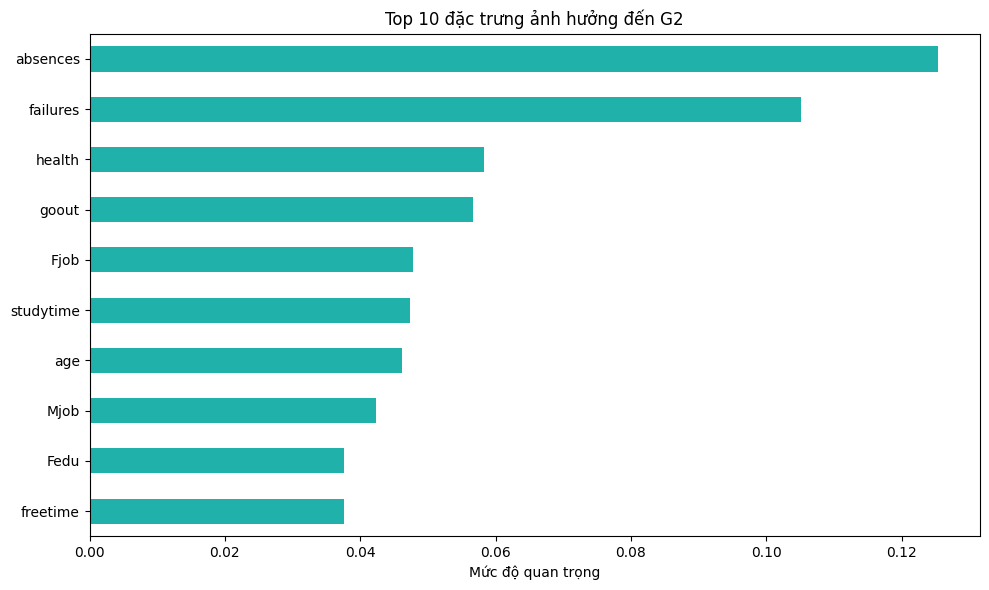

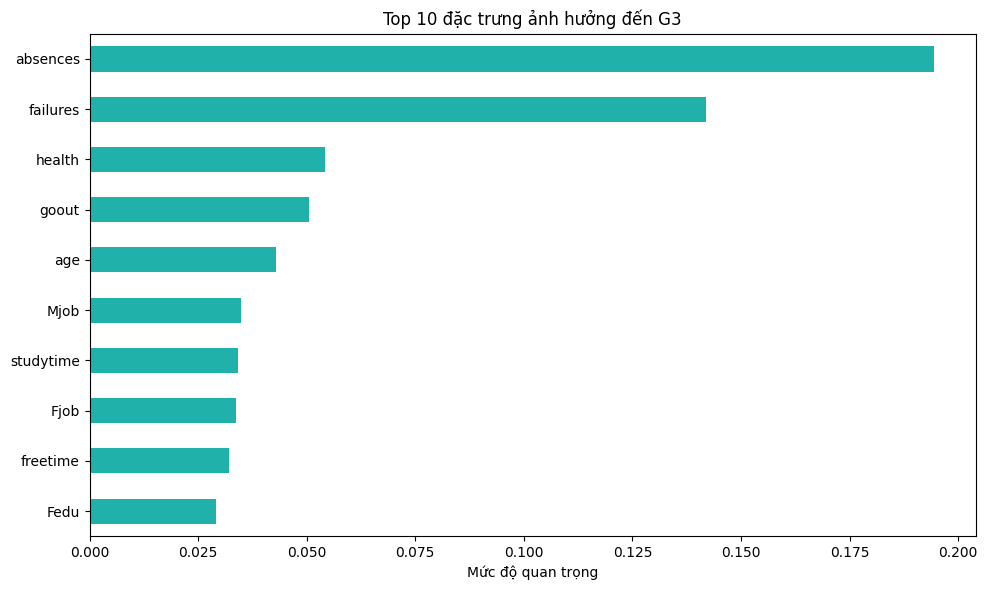

In [ ]:

# Mã hóa các biến phân loại
df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Tách đầu vào (X) và đầu ra (Y)
X = df_encoded.drop(['G1', 'G2', 'G3'], axis=1)
Y = df_encoded[['G1', 'G2', 'G3']]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Dùng Decision Tree để dự đoán nhiều đầu ra
tree_model = DecisionTreeRegressor(random_state=42)
multi_tree = MultiOutputRegressor(tree_model)

# Huấn luyện
multi_tree.fit(X_train, y_train)

# Dự đoán
y_pred_tree = multi_tree.predict(X_test)

# Đánh giá
mse_g1_tree = mean_squared_error(y_test.iloc[:, 0], y_pred_tree[:, 0])
mse_g2_tree = mean_squared_error(y_test.iloc[:, 1], y_pred_tree[:, 1])
mse_g3_tree = mean_squared_error(y_test.iloc[:, 2], y_pred_tree[:, 2])

print("Decision Tree (ID3-style regression):")
print(f"MSE G1: {mse_g1_tree:.2f}")
print(f"MSE G2: {mse_g2_tree:.2f}")
print(f"MSE G3: {mse_g3_tree:.2f}")


# Dùng Random Forest để dự đoán nhiều đầu ra
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
multi_forest = MultiOutputRegressor(forest_model)

# Huấn luyện
multi_forest.fit(X_train, y_train)

# Dự đoán
y_pred_forest = multi_forest.predict(X_test)

# Đánh giá
mse_g1_forest = mean_squared_error(y_test.iloc[:, 0], y_pred_forest[:, 0])
mse_g2_forest = mean_squared_error(y_test.iloc[:, 1], y_pred_forest[:, 1])
mse_g3_forest = mean_squared_error(y_test.iloc[:, 2], y_pred_forest[:, 2])

print("\n Random Forest:")
print(f"MSE G1: {mse_g1_forest:.2f}")
print(f"MSE G2: {mse_g2_forest:.2f}")
print(f"MSE G3: {mse_g3_forest:.2f}")

print("\n So sánh MSE:")
print(f"G1 - Tree: {mse_g1_tree:.2f}, Forest: {mse_g1_forest:.2f}")
print(f"G2 - Tree: {mse_g2_tree:.2f}, Forest: {mse_g2_forest:.2f}")
print(f"G3 - Tree: {mse_g3_tree:.2f}, Forest: {mse_g3_forest:.2f}")




# Vẽ cây hồi quy cho từng điểm G1, G2, G3
titles = ['Cây hồi quy dự đoán G1', 'Cây hồi quy dự đoán G2', 'Cây hồi quy dự đoán G3']

for i in range(3):
    plt.figure(figsize=(14, 6))  # Giảm kích thước hình
    plot_tree(
        multi_tree.estimators_[i],
        feature_names=X.columns,
        filled=True,
        max_depth=2,          # Đơn giản hóa cây (giới hạn độ sâu)
        fontsize=9            
    )
    plt.title(titles[i], fontsize=14)
    plt.tight_layout()
    plt.show()


# Lấy cây đầu tiên trong rừng để vẽ
tree_in_forest = multi_forest.estimators_[0].estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_in_forest, feature_names=X.columns, filled=True, max_depth=2)
plt.title("Một cây trong Random Forest dự đoán G1")
plt.show()

# Danh sách tiêu đề cho 3 biểu đồ
titles = ['Top 10 đặc trưng ảnh hưởng đến G1', 
          'Top 10 đặc trưng ảnh hưởng đến G2', 
          'Top 10 đặc trưng ảnh hưởng đến G3']

# Tạo 3 biểu đồ
for i in range(3):
    # Lấy độ quan trọng của đặc trưng từ mô hình Random Forest cho G1, G2, G3
    importances = multi_forest.estimators_[i].feature_importances_
    features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

    # Vẽ biểu đồ thanh
    plt.figure(figsize=(10, 6))
    features.head(10).plot(kind='barh', color='lightseagreen')
    plt.gca().invert_yaxis()  # Đặt đặc trưng quan trọng nhất ở trên
    plt.title(titles[i])
    plt.xlabel("Mức độ quan trọng")
    plt.tight_layout()
    plt.show()

## 4. Đánh giá mô hình

## 5. Ứng dụng

In [ ]:
# --- 1. Nhập dữ liệu học sinh mới ---
new_student = {
    'school': 'GP',
    'sex': 'F',
    'age': 17,
    'address': 'U',
    'famsize': 'GT3',
    'Pstatus': 'T',
    'Medu': 4,
    'Fedu': 3,
    'Mjob': 'teacher',
    'Fjob': 'services',
    'reason': 'course',
    'guardian': 'mother',
    'traveltime': 1,
    'studytime': 2,
    'failures': 0,
    'schoolsup': 'yes',
    'famsup': 'no',
    'paid': 'no',
    'activities': 'yes',
    'nursery': 'yes',
    'higher': 'yes',
    'internet': 'yes',
    'romantic': 'no',
    'famrel': 4,
    'freetime': 3,
    'goout': 3,
    'Dalc': 1,
    'Walc': 2,
    'health': 5,
    'absences': 4
}

# --- 2. Tạo DataFrame từ dict ---
new_df = pd.DataFrame([new_student])

# --- 3. Mã hóa các biến phân loại giống như lúc huấn luyện ---
new_df_encoded = new_df.copy()
for col in new_df.columns:
    if df[col].dtype == 'object':  # dùng df gốc để lấy unique categories
        le = LabelEncoder()
        le.fit(df[col])  # học từ dữ liệu gốc
        new_df_encoded[col] = le.transform(new_df[col])

# --- 4. Đảm bảo đúng thứ tự cột ---
new_df_encoded = new_df_encoded[X.columns]

# --- 5. Dự đoán bằng mô hình đã huấn luyện ---
predicted = multi_forest.predict(new_df_encoded)

# --- 6. Hiển thị kết quả ---
print(f"Dự đoán điểm G1, G2, G3 cho học sinh mới: {predicted[0]}")


Dự đoán điểm G1, G2, G3 cho học sinh mới: [10.31 11.02 10.77]
